# Copenhagen Airbnb Data (March 25-April 24, 2019)

## - Machine Learning - 

### Importing libraries

In [1]:
import warnings
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
from sklearn.preprocessing import StandardScaler as scaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")

### Fetching data

In [2]:
os.chdir(r"C:\Users\aleen\Desktop\Data Science\Data Mining, Machine Learning, Deep Learning\Exam Project\Data\Detailed\Listings")

In [3]:
df = pd.read_csv('airbnb_copenhagen_year')

In [4]:
df.head()

,id,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,...,a_few_days,no_response,within_a_day,within_a_few_hours,within_an_hour,flexible,moderate,strict_14_with_grace_period,super_strict_30,distance_to_center
0,6983,f,2,1.0,1.0,1.0,366.0,0.0,33.0,1,...,0,1,0,0,0,0,1,0,0,1.938488
1,29118,f,2,1.0,1.0,1.0,798.0,0.0,300.0,1,...,0,0,1,0,0,0,0,1,0,1.065984
2,29618,t,4,1.0,3.0,3.0,857.0,0.0,75.0,1,...,0,1,0,0,0,0,1,0,0,1.964055
3,31094,f,3,1.0,1.0,3.0,751.0,1000.0,0.0,2,...,0,1,0,0,0,0,0,1,0,1.268696
4,32379,f,4,2.0,2.0,4.0,1083.0,1493.0,0.0,2,...,0,0,0,0,1,0,1,0,0,1.029972


In [5]:
df.columns

Index(['id', 'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable', 'Jan',
       'Feb', 'Mar', 'Apr', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
       'host_age', 'a_few_days', 'no_response', 'within_a_day',
       'within_a_few_hours', 'within_an_hour', 'flexible', 'moderate',
       'strict_14_with_grace_period', 'super_strict_30', 'distance_to_center'],
      dtype='object')

In [6]:
df = df.drop(['id'], axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.host_identity_verified = labelencoder.fit_transform(df.host_identity_verified)

## Regression
### Predicting 1) Price and 2) Review Rating

Decision Trees
Linear Regression
Neural Network
Suport Vector Regression
Regression Trees

### Feature/Target split

In [8]:
X = df.drop(['price'], axis=1)
y = df.price
print(X.shape)
print(y.shape)

(245288, 32)
(245288,)


## Further limiting features. Does it help?

### Train/Test split

In [9]:
from sklearn.model_selection import train_test_split
# Splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
print("Testing dataset length: ",len(X_test))
print("Training dataset length: ",len(X_train))

Testing dataset length:  49058
Training dataset length:  196230


### Scaling the data

In [10]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Ridge regression

In [11]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)

In [12]:
reg.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [13]:
reg.coef_

array([ -0.40513858,  97.20088752,  18.30915993,  65.10983507,
        13.27743188,   5.31990093,  45.19353561,  10.28192005,
        -4.51156144, -18.81030968,  -0.15968912,   0.85252374,
         0.55438092,   1.11263451,   2.82498916,  -3.24963589,
        -2.6557199 ,  -1.42523396,  -0.24750172,   1.06087169,
         1.17298993,   0.94197663,   4.5960369 , -12.84557822,
        10.01366877,   5.32117596,   2.17042245,  -3.54685389,
         0.82389862,   3.19528006,   5.12586285, -94.25439821])

In [14]:
reg.intercept_

718.9582887428019

In [17]:
# Make predictions using the testing set
y_pred = reg.predict(X_test)
# The mean squared error
print("Mean squared error MSE: %.2f"
      % mean_squared_error(y_test, y_pred))
# The root of the mean squared error
print('Root Mean Squared Error RMSE: %.2f' % math.sqrt(mean_squared_error(y_test, y_pred)))
# The mean absolute error
print("Mean absolute error MAE: %.2f"
      % mean_absolute_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score R2: %.2f' % r2_score(y_test, y_pred))

Mean squared error MSE: 60378.81
Root Mean Squared Error RMSE: 245.72
Mean absolute error MAE: 185.48
Variance score R2: 0.43


## Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression(normalize=False)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
lin_reg.coef_

array([-4.39992209e-01,  9.71281338e+01,  1.82939941e+01,  6.51811083e+01,
        1.33167604e+01,  5.43010938e+00,  4.52097250e+01,  1.02056693e+01,
       -4.50810645e+00, -1.88232101e+01, -9.69667257e-02,  2.12522109e+14,
        2.12680410e+14,  2.12857680e+14,  2.13034718e+14,  2.13716787e+14,
        2.12046097e+14,  2.11263553e+14,  2.11103592e+14,  2.10933730e+14,
        2.12680410e+14,  9.49133488e-01, -7.93042933e+12, -3.04302497e+13,
       -2.02790703e+13, -1.83578468e+13, -2.47382174e+13,  6.85811868e+13,
        6.50190935e+13,  5.83607732e+13,  6.24147523e+11, -9.42104648e+01])

In [20]:
lin_reg.intercept_

718.901202311177

In [21]:
# Make predictions using the testing set
y_pred = lin_reg.predict(X_test)

In [22]:
# The mean squared error
print("Mean squared error MSE: %.2f"
      % mean_squared_error(y_test, y_pred))
# The root of the mean squared error
print('Root Mean Squared Error RMSE: %.2f' % math.sqrt(mean_squared_error(y_test, y_pred)))
# The mean absolute error
print("Mean absolute error MAE: %.2f"
      % mean_absolute_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score R2: %.2f' % r2_score(y_test, y_pred))

Mean squared error MSE: 14914696508931970472869888.00
Root Mean Squared Error RMSE: 3861955011251.68
Mean absolute error MAE: 3083582895731.51
Variance score R2: -141168438850690613248.00


NameError: name 'distance_to_center' is not defined

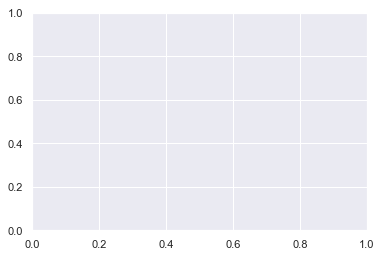

In [19]:
fig, ax = plt.subplots()
ax.plot(distance_to_center,y_test, 'o', label = 'True Data')
ax.plot(distance_to_center, y_pred, 'o', label = 'Prediction')
ax.legend(loc = 'best')

In [20]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lin_reg, parameters)
grid.fit(X_train, y_train)
grid_search = grid.fit(X_train, y_train)
best_metric = grid.best_score_
best_parameters = grid.best_params_

In [21]:
lin_reg1 = LinearRegression(best_parameters)
lin_reg1.fit(X_train,y_train)

LinearRegression(copy_X=True,
         fit_intercept={'copy_X': True, 'fit_intercept': True, 'normalize': True},
         n_jobs=None, normalize=False)

In [22]:
# Make predictions using the testing set
y_pred = lin_reg1.predict(X_test)
# The mean squared error
print("Mean squared error MSE: %.2f"
      % mean_squared_error(y_test, y_pred))
# The root of the mean squared error
print('Root Mean Squared Error RMSE: %.2f' % math.sqrt(mean_squared_error(y_test, y_pred)))
# The mean absolute error
print("Mean absolute error MAE: %.2f"
      % mean_absolute_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score R2: %.2f' % r2_score(y_test, y_pred))

Mean squared error MSE: 1955576811740974439989248.00
Root Mean Squared Error RMSE: 1398419397656.14
Mean absolute error MAE: 1158611262872.02
Variance score R2: -18641028427613417472.00


# Decision tree

In [23]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

#### Feature importances

In [24]:
features = list(X.columns)

In [25]:
# get feature importances
featureImportances = list(zip(features, dt_reg.feature_importances_))
list(sorted(featureImportances, key = lambda x: x[1], reverse = True))

[('bedrooms', 0.2674053227377966),
 ('distance_to_center', 0.2605425594026691),
 ('cleaning_fee', 0.07672376870392131),
 ('number_of_reviews', 0.0646561701519621),
 ('accommodates', 0.06119924888804309),
 ('host_age', 0.059238715915093054),
 ('review_scores_rating', 0.04104119758249926),
 ('security_deposit', 0.028199189309682567),
 ('beds', 0.02682107372139827),
 ('guests_included', 0.022133777220359373),
 ('bathrooms', 0.017799323337296426),
 ('host_identity_verified', 0.014841179235179363),
 ('instant_bookable', 0.012260030061765886),
 ('strict_14_with_grace_period', 0.010681435046715933),
 ('flexible', 0.009189982390057257),
 ('moderate', 0.00871156636397006),
 ('no_response', 0.005331807342882107),
 ('within_an_hour', 0.00302762549051012),
 ('within_a_day', 0.0026097426165230717),
 ('within_a_few_hours', 0.001765467751763714),
 ('Jul', 0.0008553731502724824),
 ('a_few_days', 0.0008099168163995771),
 ('Apr', 0.000780350540500173),
 ('Jan', 0.0005204983561873108),
 ('Nov', 0.0004912

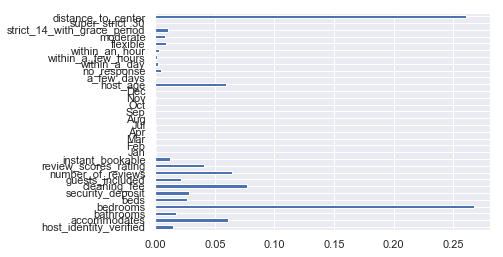

In [26]:
(pd.Series(dt_reg.feature_importances_, index=X.columns)
   .plot(kind='barh'))  

In [27]:
# Make predictions using the testing set
y_pred = dt_reg.predict(X_test)
# The mean squared error
print("Mean squared error MSE: %.2f"
      % mean_squared_error(y_test, y_pred))
# The root of the mean squared error
print('Root Mean Squared Error RMSE: %.2f' % math.sqrt(mean_squared_error(y_test, y_pred)))
# The mean absolute error
print("Mean absolute error MAE: %.2f"
      % mean_absolute_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score R2: %.2f' % r2_score(y_test, y_pred))

Mean squared error MSE: 25642.12
Root Mean Squared Error RMSE: 160.13
Mean absolute error MAE: 56.86
Variance score R2: 0.76


#### Improving performance 

In [29]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'max_depth': [3,6,9], 'max_leaf_nodes' : [3,6,9],
              'splitter' : ['best', 'random'], 'presort':[True,False]}]

grid_search = GridSearchCV(estimator = dt_reg,
                           param_grid = parameters,
                           cv = 10,
                           n_jobs= -1)
grid_search = grid_search.fit(X_train, y_train)
best_r2 = grid_search.best_score_
best_parameters = grid_search.best_params_

In [30]:
best_parameters

{'max_depth': 3, 'max_leaf_nodes': 9, 'presort': True, 'splitter': 'best'}

In [31]:
dt_reg = DecisionTreeRegressor(max_depth=3,max_leaf_nodes=9,presort=True,splitter='best')
dt_reg.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = dt_reg.predict(X_test)

# The mean squared error
print("Mean squared error MSE: %.2f"
      % mean_squared_error(y_test, y_pred))
# The root of the mean squared error
print('Root Mean Squared Error RMSE: %.2f' % math.sqrt(mean_squared_error(y_test, y_pred)))
# The mean absolute error
print("Mean absolute error MAE: %.2f"
      % mean_absolute_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score R2: %.2f' % r2_score(y_test, y_pred))

Mean squared error MSE: 66604.97
Root Mean Squared Error RMSE: 258.08
Mean absolute error MAE: 196.17
Variance score R2: 0.37


## Random forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

# train the model
rf_reg = RandomForestRegressor(max_depth = 12, n_estimators = 100, random_state = 1)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [34]:
# Make predictions using the testing set
y_pred = rf_reg.predict(X_test)

# The mean squared error
print("Mean squared error MSE: %.2f"
      % mean_squared_error(y_test, y_pred))
# The root of the mean squared error
print('Root Mean Squared Error RMSE: %.2f' % math.sqrt(mean_squared_error(y_test, y_pred)))
# The mean absolute error
print("Mean absolute error MAE: %.2f"
      % mean_absolute_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score R2: %.2f' % r2_score(y_test, y_pred))

Mean squared error MSE: 39678.96
Root Mean Squared Error RMSE: 199.20
Mean absolute error MAE: 149.49
Variance score R2: 0.62


In [35]:
# get feature importances
featureImportances = list(zip(features, rf_reg.feature_importances_))
list(sorted(featureImportances, key = lambda x: x[1], reverse = True))

[('bedrooms', 0.4245446004408984),
 ('distance_to_center', 0.2218553691385288),
 ('accommodates', 0.08864237056636666),
 ('cleaning_fee', 0.08478079006399138),
 ('number_of_reviews', 0.0335618863738075),
 ('host_age', 0.023683340815643654),
 ('review_scores_rating', 0.02245976071229843),
 ('bathrooms', 0.019798519298340315),
 ('beds', 0.01878846359888328),
 ('security_deposit', 0.017553802157972812),
 ('guests_included', 0.014577217357921843),
 ('host_identity_verified', 0.005475967194541008),
 ('instant_bookable', 0.004648497343940255),
 ('strict_14_with_grace_period', 0.004455616188816598),
 ('no_response', 0.0038249080510758134),
 ('flexible', 0.003655593891353193),
 ('moderate', 0.0033022994401284817),
 ('within_a_day', 0.0013035858882854165),
 ('within_an_hour', 0.0008883245990983636),
 ('a_few_days', 0.0005642010258292248),
 ('super_strict_30', 0.00045998635683475257),
 ('within_a_few_hours', 0.00041674920176001896),
 ('Jul', 0.0001707911499418393),
 ('Apr', 0.0001180512648293629

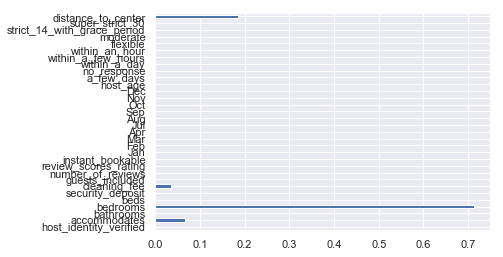

In [36]:
(pd.Series(dt_reg.feature_importances_, index=X.columns)
   .plot(kind='barh'))  

In [37]:
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth':[3,6,9],"bootstrap": [True,False], "n_estimators": [10,50,100,150], 'random_state':[0,1,3]}]
grid_search = GridSearchCV(estimator = rf_reg,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 3,
                           n_jobs= -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

KeyboardInterrupt: 

In [38]:
best_parameters

{'bootstrap': True, 'max_depth': 9, 'n_estimators': 150, 'random_state': 0}

In [38]:
# train the model
rf_reg1 = RandomForestRegressor(bootstrap=True, max_depth = 9, n_estimators = 150, random_state = 0)
rf_reg1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [39]:
y_predict = rf_reg1.predict(X_test)
# The mean squared error
print("Mean squared error MSE: %.2f"
      % mean_squared_error(y_test, y_pred))
# The root of the mean squared error
print('Root Mean Squared Error RMSE: %.2f' % math.sqrt(mean_squared_error(y_test, y_pred)))
# The mean absolute error
print("Mean absolute error MAE: %.2f"
      % mean_absolute_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score R2: %.2f' % r2_score(y_test, y_pred))

Mean squared error MSE: 39678.96
Root Mean Squared Error RMSE: 199.20
Mean absolute error MAE: 149.49
Variance score R2: 0.62


## SVR

In [ ]:
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(X_train, y_train)

In [ ]:
# Make predictions using the testing set
y_pred = svr_reg.predict(X_test)

# The mean squared error
print("Mean squared error MSE: %.2f"
      % mean_squared_error(y_test, y_pred))
# The root of the mean squared error
print('Root Mean Squared Error RMSE: %.2f' % math.sqrt(mean_squared_error(y_test, y_pred)))
# The mean absolute error
print("Mean absolute error MAE: %.2f"
      % mean_absolute_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score R2: %.2f' % r2_score(y_test, y_pred))

## Gradient Boosting Regressor

In [23]:
>>> import numpy as np
>>> from sklearn.metrics import mean_squared_error
>>> from sklearn.datasets import make_friedman1
>>> from sklearn.ensemble import GradientBoostingRegressor

In [25]:
>>> est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
...     max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)
>>> mean_absolute_error(y_test, est.predict(X_test))    

184.91321883655985

In [26]:
# Make predictions using the testing set
y_pred = est.predict(X_test)

# The mean squared error
print("Mean squared error MSE: %.2f"
      % mean_squared_error(y_test, y_pred))
# The root of the mean squared error
print('Root Mean Squared Error RMSE: %.2f' % math.sqrt(mean_squared_error(y_test, y_pred)))
# The mean absolute error
print("Mean absolute error MAE: %.2f"
      % mean_absolute_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score R2: %.2f' % r2_score(y_test, y_pred))

Mean squared error MSE: 59803.09
Root Mean Squared Error RMSE: 244.55
Mean absolute error MAE: 184.91
Variance score R2: 0.43
